# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیداکردن اشیاء با  Feature Matching و Homography </div>


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('images/box.png', 0) #query
img2 = cv2.imread('images/box_in_scene.png', 0) #train

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
findHomography سعی می کند بهترین تبدیل را بین دو مجموعه نقطه پیدا کند. از چیزی هوشمندتر از حداقل مربعات به نام RANSAC استفاده می کند که توانایی رد نقاط پرت را دارد.
<br/>
getPerspectiveTransform که قبلا دیدیم برای موقعیت‌هایی مفید است که فقط 4 نقطه داریم و می‌دانید که آنها درست هستند است. در واقع تابع findHomography معمولاً با مجموعه‌ای از نقاط که به طور خودکار شناسایی می‌شوند استفاده می‌شوند. چون خودکار پیدا میشوند معمولا دقت پایین تری دارند و در عوض تعداد بالاتری نقطه داریم، اما getPerspectiveTransform زمانی خوب است که 4 نقطه اما با دقت داریم، مثل علامت گذاری دستی چهار گوشه‌ی یک کاغذ!
</div>

In [2]:
MIN_MATCH_COUNT = 10

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

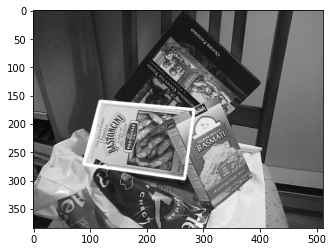

In [3]:
plt.imshow(img2, 'gray');

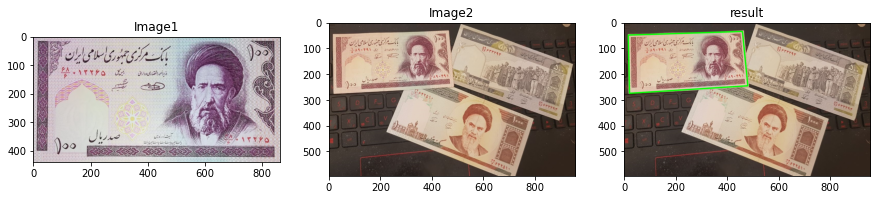

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

original_img1 = cv2.imread('images/10tomani.jpg') #query
original_img2 = cv2.imread('images/eskenas.jpg') #train

result = original_img2.copy()
img1 = cv2.cvtColor(original_img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(original_img2, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
MIN_MATCH_COUNT = 10


if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    result = cv2.polylines(result,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    

plt.figure(figsize=[15,4])
plt.subplot(131),plt.imshow(original_img1[...,::-1]),plt.title('Image1');
plt.subplot(132),plt.imshow(original_img2[...,::-1]),plt.title('Image2');
plt.subplot(133),plt.imshow(result[...,::-1]),plt.title('result');


In [ ]:
dst

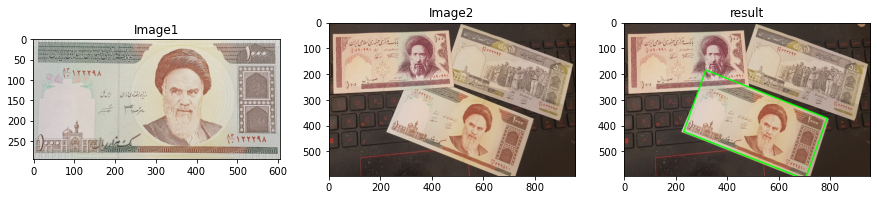

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

original_img1 = cv2.imread('images/100tomani.jpg') #query
original_img2 = cv2.imread('images/eskenas.jpg') #train

result = original_img2.copy()
img1 = cv2.cvtColor(original_img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(original_img2, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
MIN_MATCH_COUNT = 10


if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    result = cv2.polylines(result,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    

plt.figure(figsize=[15,4])
plt.subplot(131),plt.imshow(original_img1[...,::-1]),plt.title('Image1');
plt.subplot(132),plt.imshow(original_img2[...,::-1]),plt.title('Image2');
plt.subplot(133),plt.imshow(result[...,::-1]),plt.title('result');


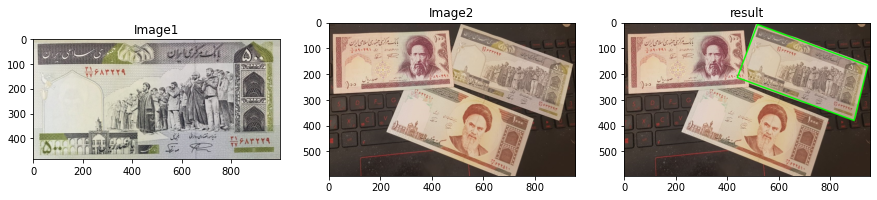

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

original_img1 = cv2.imread('images/50tomani.jpg') #query
original_img2 = cv2.imread('images/eskenas.jpg') #train

result = original_img2.copy()
img1 = cv2.cvtColor(original_img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(original_img2, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
MIN_MATCH_COUNT = 10


if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    result = cv2.polylines(result,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None
    

plt.figure(figsize=[15,4])
plt.subplot(131),plt.imshow(original_img1[...,::-1]),plt.title('Image1');
plt.subplot(132),plt.imshow(original_img2[...,::-1]),plt.title('Image2');
plt.subplot(133),plt.imshow(result[...,::-1]),plt.title('result');


[آموزش یادگیری عمیق در سایت کلاس‌ویژن](https://class.vision)

https://docs.opencv.org/4.x/d1/de0/tutorial_py_feature_homography.html